# Detecting red color

In [2]:
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Red Color

### Create a red color block

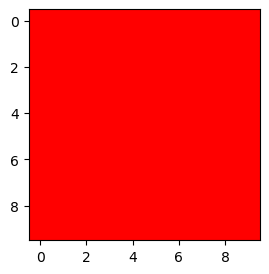

In [9]:
# Define the dimensions of each color strip
height = 10
width = 10

# Create an empty image of the required size with 3 layers for RGB
image = np.zeros((height , width, 3), dtype=np.uint8)
image[:,:] = (255,0,0)

# Display the image using matplotlib
plt.figure(figsize=(3, 3))
plt.imshow(image)
plt.show()

### Exercise 1: Change to other possible red color

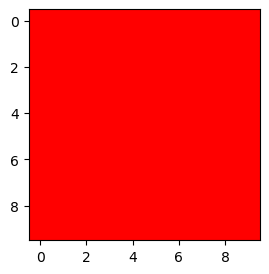

In [8]:
# Define the dimensions of each color strip
height = 10
width = 10

# Create an empty image of the required size with 3 layers for RGB
image = np.zeros((height , width, 3), dtype=np.uint8)
image[:,:] = (255,0,0)

# Display the image using matplotlib
plt.figure(figsize=(3, 3))
plt.imshow(image)
plt.show()

### Exercise 2: Create a red gradient strip

Modify the code below to display a red gradient strip
Hints: Use for-loop


<img src="../resource/playing_image_red_gradient.png" width=300/>

In [ ]:
# Define the dimensions
height = 90
width = 255

# Create an empty image of the required size with 3 layers for RGB
image = np.zeros((height , width, 3), dtype=np.uint8)

# Write your code here
for x in range(height):
    for y in range(width):
        image[x][y] = (0,0,0)        

# Display the image using matplotlib
plt.figure(figsize=(3, 3))
plt.imshow(image)
plt.show()

#### Answer

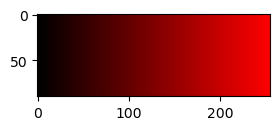

In [12]:
# Define the dimensions
height = 90
width = 255

# Create an empty image of the required size with 3 layers for RGB
image = np.zeros((height , width, 3), dtype=np.uint8)

# Write your code here
for x in range(height):
    for y in range(width):
        image[x][y] = (0,0,0)        

# Display the image using matplotlib
plt.figure(figsize=(3, 3))
plt.imshow(image)
plt.show()

### Exercise 3: Create a vertical gradient strip


<img src="../resource/playing_image_red_gradient_vertical.png" width=300/>

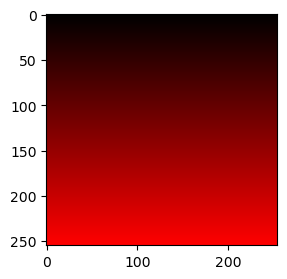

In [15]:
# Define the dimensions
height = 255
width = 255

# Create an empty image of the required size with 3 layers for RGB
image = np.zeros((height , width, 3), dtype=np.uint8)

# Write your code here
for x in range(height):
    for y in range(width):
        image[x][y] = (x,0,0) 

# Display the image using matplotlib
plt.figure(figsize=(3, 3))
plt.imshow(image)
plt.show()

## Converting Color Space

### From RGB to HSV

Let's create a pure red image

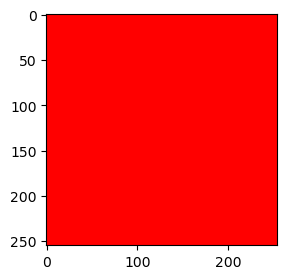

In [26]:
image = np.zeros((height , width, 3), dtype=np.uint8)

image[:,:] = (255,0,0)
plt.figure(figsize=(3, 3))
plt.imshow(image)

We use `cv2.cvtColor(image, cv2.COLOR_RGB2HSV)` to convert an image to HSV color space

In [30]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

In [31]:
# Let's check the value of the converted image
image_hsv[0][0]

array([  0, 255, 255], dtype=uint8)

If we use `plt.imshow` to show the image, we will see a different color because `imshow` by default assume the image in RGB colorspace.

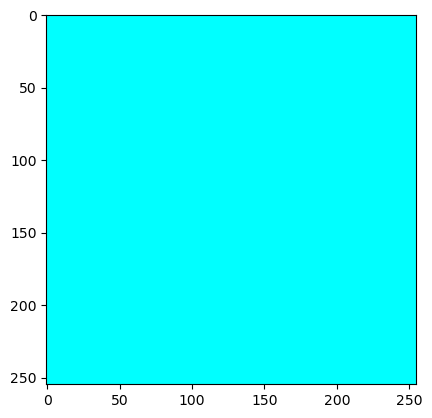

In [35]:
plt.imshow(image_hsv)

### From HSV to RGB

We can simply use `cvtColor` to convert the color space again.

See the full list of conversion here: https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html

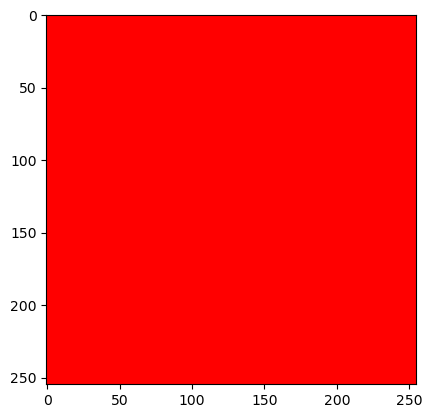

In [38]:
image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(image_rgb)

## Detect red pixels in an image

Given an image, it is hard to pick the red color using RGB colorspace. Instead, we use HSV to do so.

Consider the vertical gradient we have done before, how do you detect the red color?

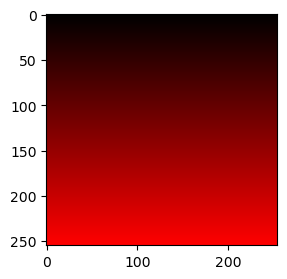

In [79]:
# Define the dimensions
height = 255
width = 255

# Create an empty image of the required size with 3 layers for RGB
image = np.zeros((height , width, 3), dtype=np.uint8)

# Write your code here
for x in range(height):
    for y in range(width):
        image[x][y] = (x,0,0) 

# Display the image using matplotlib
plt.figure(figsize=(3, 3))
plt.imshow(image)
plt.show()

### Create the HSV version

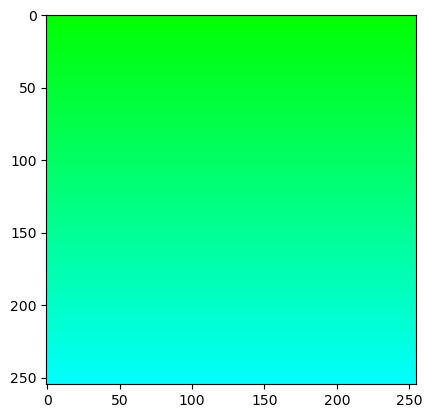

In [80]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(image_hsv)

### Mask Hue 0-10 (Mild Red to Warm Red)

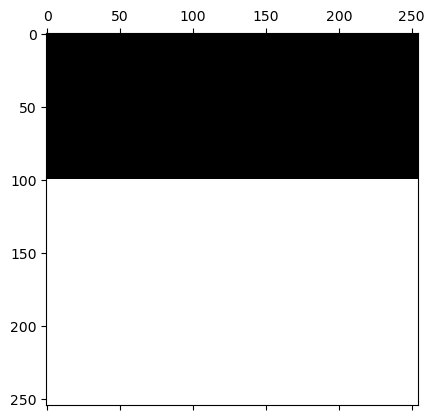

In [48]:
lower_red = np.array([0,100,100])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(image_hsv, lower_red, upper_red)
plt.matshow(mask0, cmap = 'gray')

### Mask Hue 170-180 (Cool Red to Mild Red)

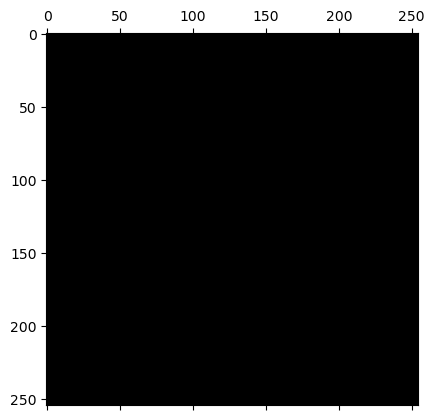

In [46]:
lower_red = np.array([170,100,100])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(image_hsv, lower_red, upper_red)
plt.matshow(mask1, cmap = 'gray')

### Combining the mask

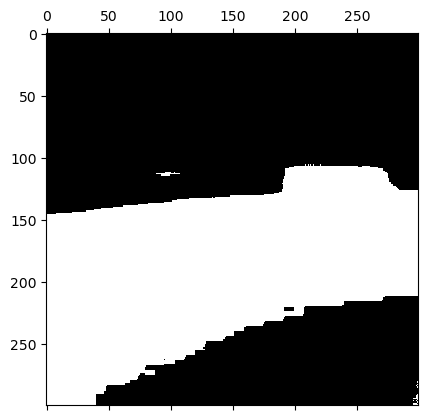

In [81]:
 # join my masks
mask = mask0+mask1
plt.matshow(mask, cmap = 'gray')

## Use a real image to test

### Read the image

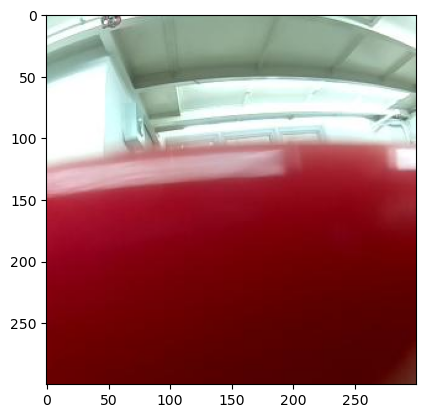

In [56]:
image = cv2.imread("../advance/resource/image_finish_line.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Exercise: Convert the image to HSV

Refer to the code sample in earlier section, complete the following program

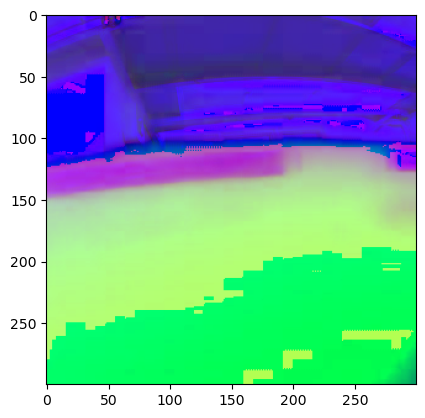

In [58]:
# Complete the code below
image_hsv = 
plt.imshow(image_hsv)

#### Answer

In [ ]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(image_hsv)

### Exercise: Create a mask for Hue 0 - 10

Complete the code here, name the mask `mask0`

In [82]:
# mask0 = 
# plt.matshow(mask0, cmap = 'gray')

#### Answer

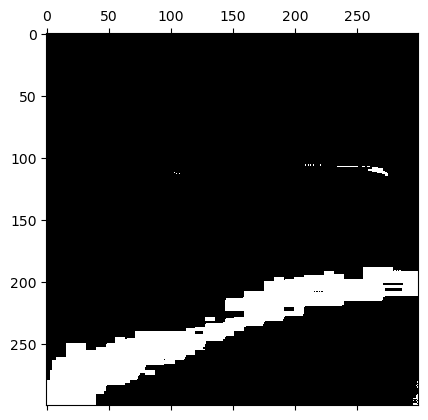

In [72]:
lower_red = np.array([0,100,100])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(image_hsv, lower_red, upper_red)
plt.matshow(mask0, cmap = 'gray')

### Exercise: Create a mask for Hue 170-180

Complete the code here, name the mask `mask1`

In [ ]:
# mask1 = 
# plt.matshow(mask1, cmap = 'gray')

#### Answer

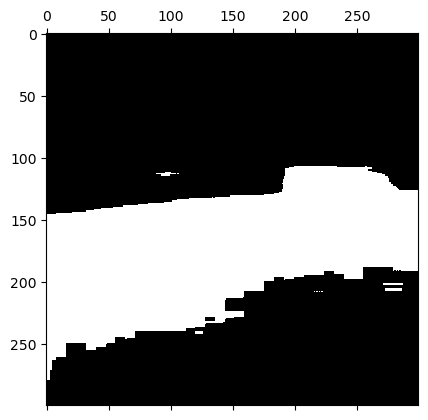

In [71]:
lower_red = np.array([170,100,100])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(image_hsv, lower_red, upper_red)
plt.matshow(mask1, cmap = 'gray')

### Exercise: Combine the mask

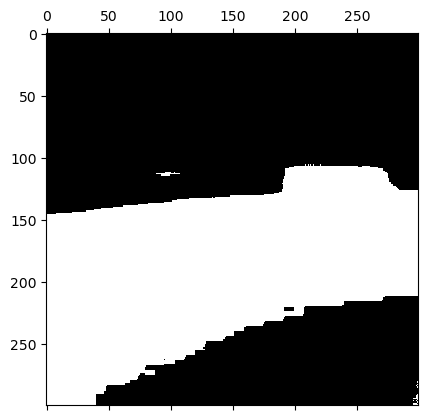

In [73]:
 # join my masks
mask = mask0+mask1

plt.matshow(mask, cmap = 'gray')


### Compare the mask

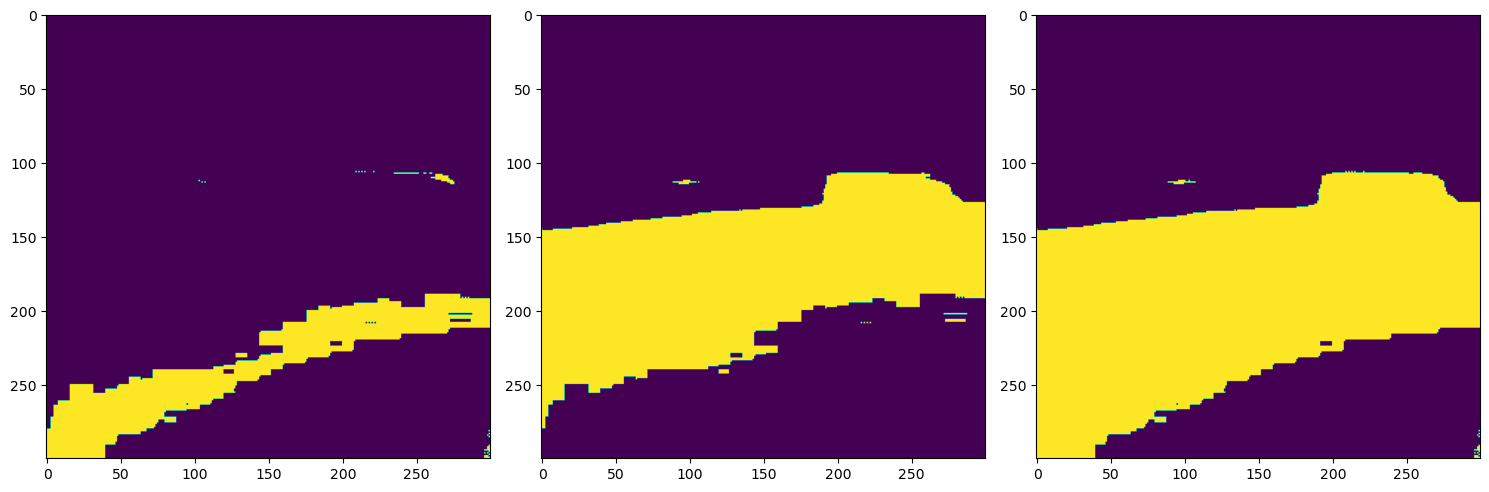

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(mask0) 
axs[1].imshow(mask1) 
axs[2].imshow(mask) 

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()